In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Lottka-Volterra Equations

Also known as the predator-prey equations, the Lotka-Volterra equations are a pair of first-order, non-linear, differential equations frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. They were proposed independently by Alfred J. Lotka in 1925 and Vito Volterra in 1926:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\delta y + \gamma xy$$

If we imagine a system consisting of rabbits (prey - $x$) and foxes (predator - $y$), we can think of the coefficients in the following way:

$\alpha$ - growth rate of rabbits (due to interaction with environment, i.e., consumption of resources)
$\delta$ - normal death rate of foxes.
$\beta$ - death rate of rabbits due to interaction with foxes.
$\gamma$ - growth rate of foxes due to interaction with rabbits.

An assumption has been made here that the normal (non-fox) death rate of rabbits is small.

## Steady State Solutions

The steady state solutions are found by setting the derivatives equal to zero and solving for $x$ and $y$:

$$\frac{dx}{dt} = 0 = \alpha x - \beta xy$$

$$\frac{dy}{dt} = 0 = -\delta y + \gamma xy$$

The solutions are $x = 0$ and $y = 0$ and $x = \frac{\delta}{\gamma}$ and $y = \frac{\alpha}{\beta}$.

The non-trivial steady state solution for $\alpha = \beta = \delta = \gamma = 1$ is thus $x = 1$ and $y = 1$.

## Normalized Equations

The equations can be normalized by defining $x = \frac{\delta}{\gamma}x'$ and $y = \frac{\alpha}{\beta}y'$:

$$\frac{dx'}{dt} = x' - x'y'$$
$$\frac{dy'}{dt} = -y' + x'y'$$

The steady state solutions are $x' = 0$ and $y' = 0$ and $x' = 1$ and $y' = 1$.


In [4]:
alpha = 1. #growth rate of prey
beta = 1. #mortality rate of prey
delta = 1. #mortality rate of predators
gamma = 1. #growth rate of predators
x0 = 3 #initial population of prey
y0 = 2 #initial population of predators

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

In [9]:
Nt = 1000 #number of time steps
tmax = 20 #maximum time
t = np.linspace(0.,tmax, Nt) #time grid
X0 = [x0, y0] #initial conditions
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma)) #solve the ODE
x, y = res.T #transpose and unpack

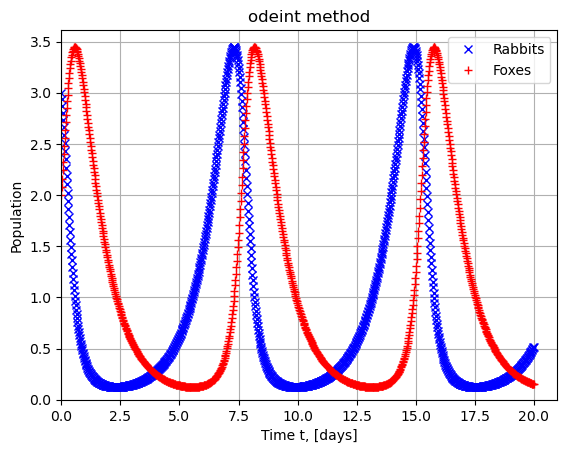

In [10]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, x, 'xb', label = 'Rabbits')
plt.plot(t, y, '+r', label = "Foxes")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.ylim(0)
plt.xlim(0)
plt.legend()

plt.show()

In [11]:
import random
import matplotlib.cm as cm

### Dependence on Mortality Rate of Prey

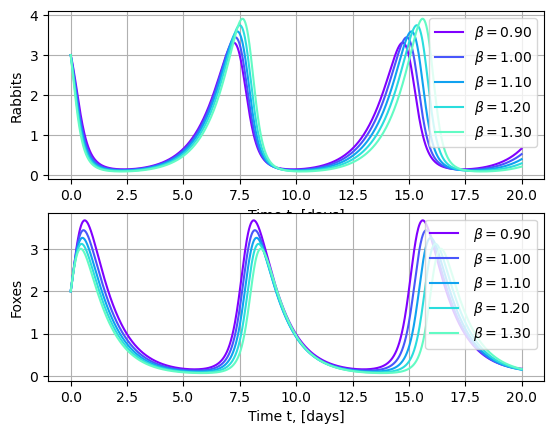

In [12]:
betas = np.arange(0.9, 1.4, 0.1) #mortality rate of prey

nums=np.random.random((10,len(betas)))
colors = cm.rainbow(np.linspace(0, 1, nums.shape[0]))  # generate the colors for each data set

fig, ax = plt.subplots(2,1)

for beta, i in zip(betas, range(len(betas))):
    res = integrate.odeint(derivative, X0, t, args = (alpha,beta, delta, gamma))
    ax[0].plot(t, res[:,0], color = colors[i],  linestyle = '-', label = r"$\beta = $" + "{0:.2f}".format(beta))
    ax[1].plot(t, res[:,1], color = colors[i], linestyle = '-', label = r" $\beta = $" + "{0:.2f}".format(beta))
    ax[0].legend()
    ax[1].legend()

ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Time t, [days]')
ax[0].set_ylabel('Rabbits')
ax[1].set_xlabel('Time t, [days]')
ax[1].set_ylabel('Foxes');

### Phase Plane

Text(0.5, 1.0, 'Predator-Prey Phase Plane')

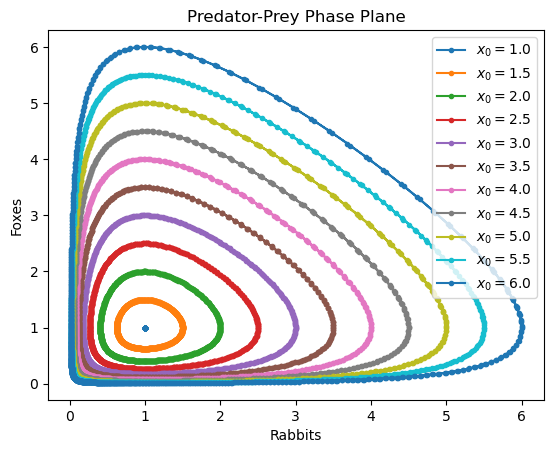

In [13]:
alpha = beta = gamma = delta = 1.0

plt.figure()
IC = np.linspace(1.0, 6.0, 11) # initial conditions for rabbit population (prey)
for rabbit in IC:
    X0 = [rabbit, 1.0]
    #plt.plot(X0[0], X0[1], "o")
    Xs = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
    plt.plot(Xs[:,0], Xs[:,1], ".-", label = "$x_0 =$"+str(X0[0]))
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.legend()
plt.title("Predator-Prey Phase Plane")